# Análise de Dados - Mercado Financeiro


Inspirado no material [📊Stock Market Analysis 📈 + Prediction using LSTM](https://www.kaggle.com/code/th3eng/stock-market-analysis-prediction-using-lstm)



## 1. Variação do preço ao longo do tempo

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime

Obtendo os dados por meio do Yahoo Finance

In [8]:
# Bradesco, Itaú, Santander, Banco do Brasil
tickers = ['BBDC4.SA', 'ITUB4.SA', 'SANB4.SA', 'BBAS3.SA']

end = datetime(2023, 4, 26)
start = datetime(end.year - 1, end.month, end.day)

for stock in tickers:
    globals()[stock.replace(".SA", "")] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
BBDC4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-26,18.82,18.850000,18.120001,18.280001,17.150255,66772900
2022-04-27,18.49,18.620001,18.190001,18.389999,17.253452,62402800
2022-04-28,18.40,18.469999,18.070000,18.219999,17.093960,66856100
2022-04-29,18.40,18.730000,17.980000,17.980000,16.868795,61884300
2022-05-02,18.00,18.170000,17.730000,17.969999,16.859409,43038200
...,...,...,...,...,...,...
2023-04-18,13.79,13.860000,13.480000,13.640000,13.640000,45070000
2023-04-19,13.50,13.560000,13.350000,13.390000,13.390000,45391200
2023-04-20,13.42,13.520000,13.160000,13.510000,13.510000,61683400


In [10]:
company_list = [BBDC4, ITUB4, SANB4, BBAS3]
company_name = ["BBDC4", "ITUB4", "SANB4", "BBAS3"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,39.299999,40.130001,39.250000,39.939999,39.939999,13342900,BBAS3
2023-04-12,40.060001,43.250000,40.009998,42.720001,42.720001,63971600,BBAS3
2023-04-13,42.639999,43.389999,42.400002,42.700001,42.700001,18396800,BBAS3
2023-04-14,42.619999,43.490002,42.150002,43.430000,43.430000,21129000,BBAS3
2023-04-17,43.369999,43.750000,43.020000,43.529999,43.529999,12049000,BBAS3
2023-04-18,43.549999,43.669998,43.029999,43.610001,43.610001,8675300,BBAS3
2023-04-19,43.389999,43.520000,42.840000,43.099998,43.099998,10504800,BBAS3
2023-04-20,42.980000,43.599998,42.709999,43.509998,43.509998,10363100,BBAS3
2023-04-24,43.419998,44.040001,43.049999,43.419998,43.419998,10259800,BBAS3


#### Preço de fechamento (ajustado)

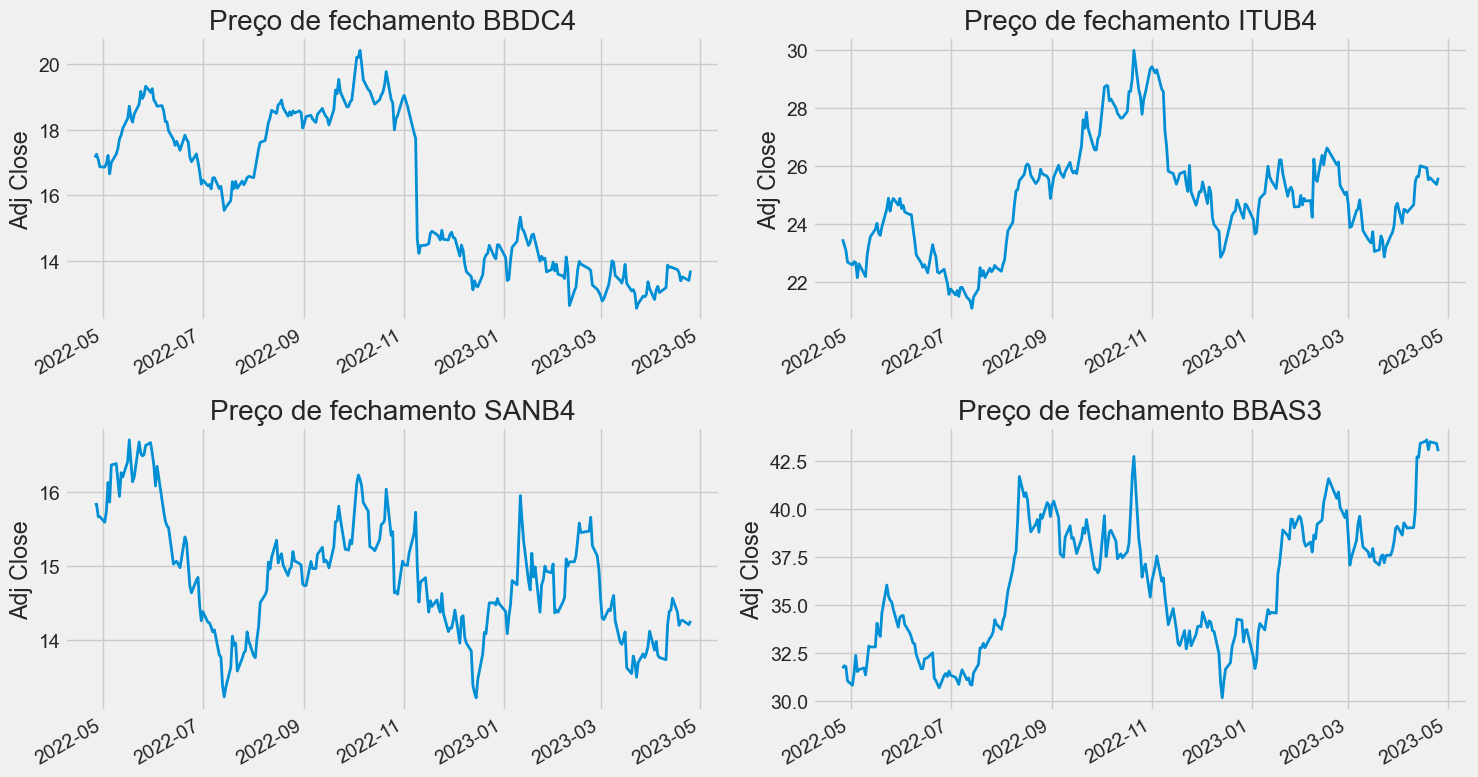

In [11]:
plt.figure(figsize=(15, 8))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=2)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Preço de fechamento {company_name[i - 1]}")
plt.tight_layout()

#### Volume dos últimos 30 dias

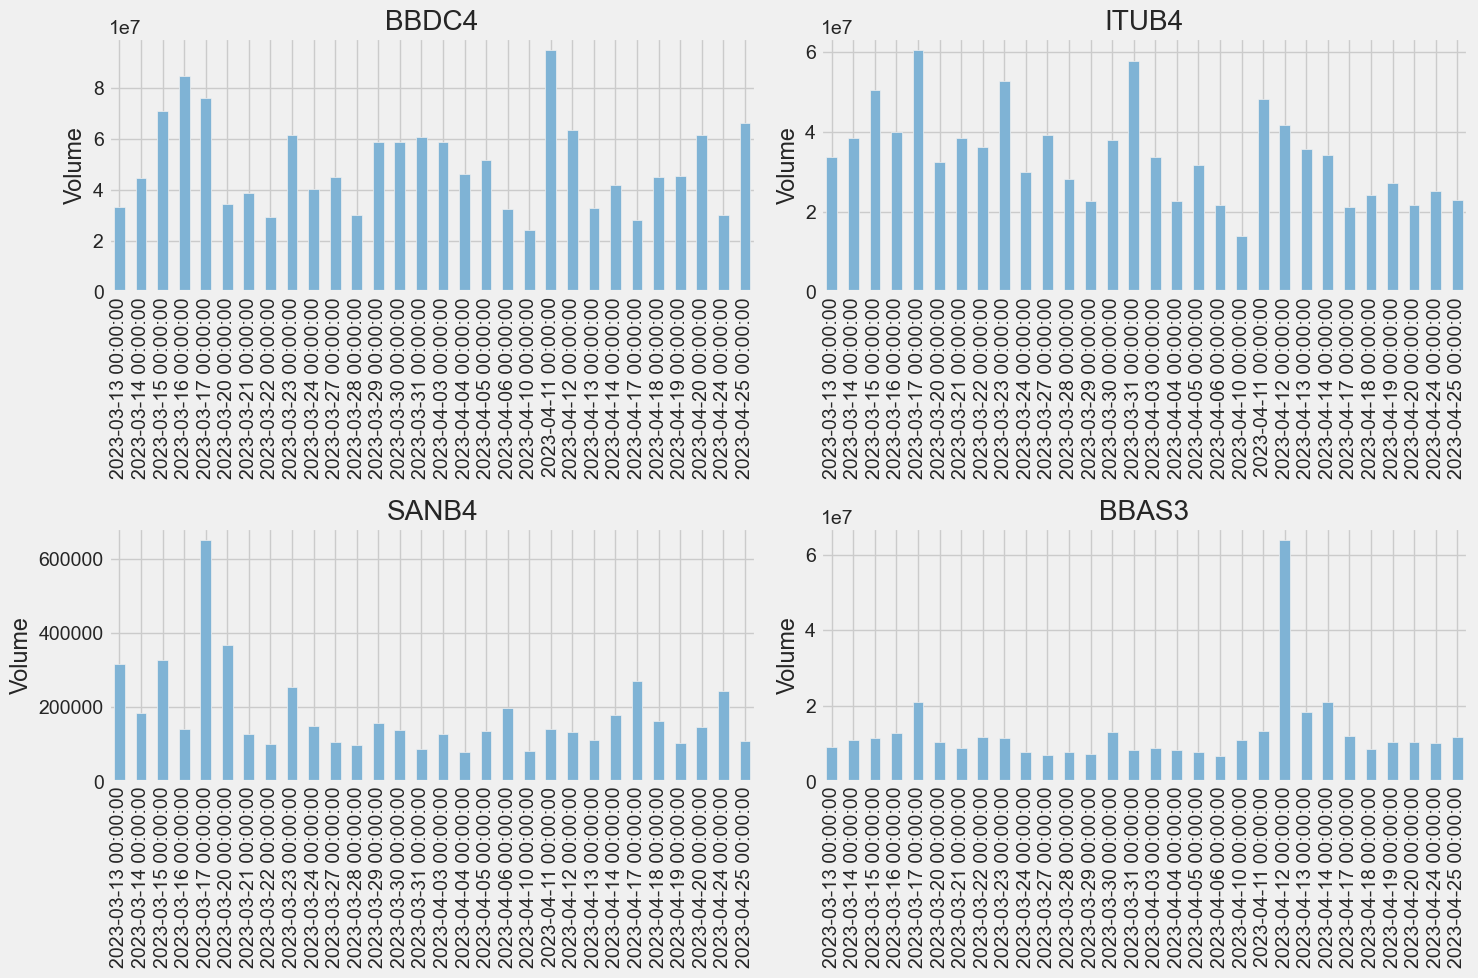

In [12]:
plt.figure(figsize=(15, 10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].iloc[-30:].plot(kind='bar', color='#7FB3D5')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")
plt.tight_layout()

## 2. Médias móveis

In [13]:
ma_day = [5, 10, 20]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA{ma}"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Visualização das médias móveis

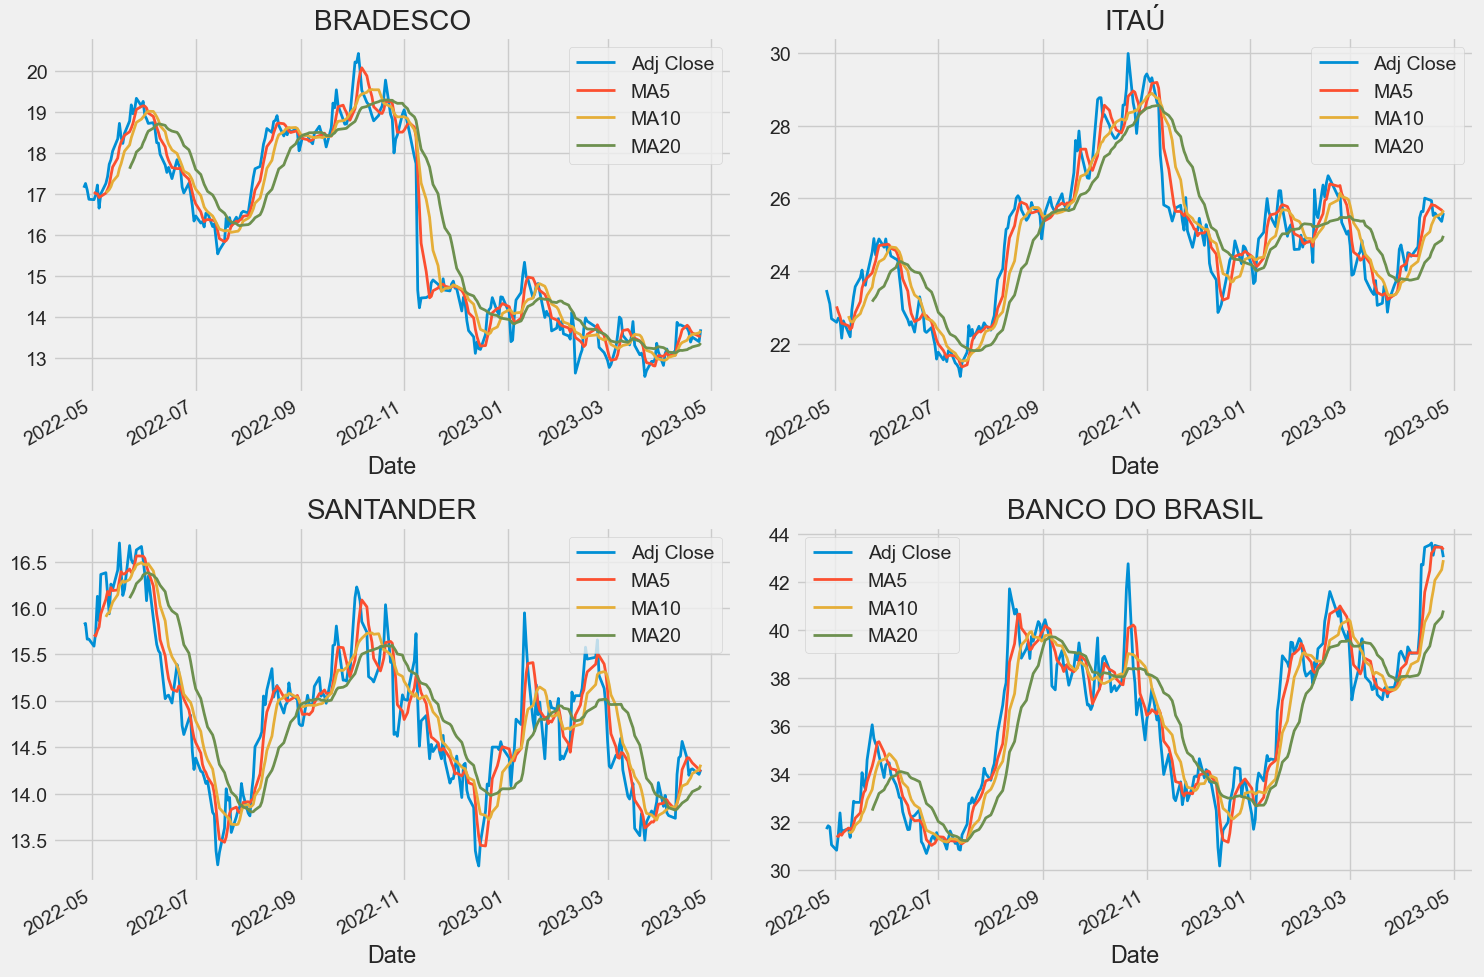

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

cols = ['Adj Close', 'MA5', 'MA10', 'MA20']

BBDC4[cols].plot(ax=axes[0,0], linewidth=2)
axes[0,0].set_title('BRADESCO')

ITUB4[cols].plot(ax=axes[0,1],linewidth=2)
axes[0,1].set_title('ITAÚ')

SANB4[cols].plot(ax=axes[1,0], linewidth=2)
axes[1,0].set_title('SANTANDER')

BBAS3[cols].plot(ax=axes[1,1], linewidth=2)
axes[1,1].set_title('BANCO DO BRASIL')

fig.tight_layout()

## 3. Retorno diário

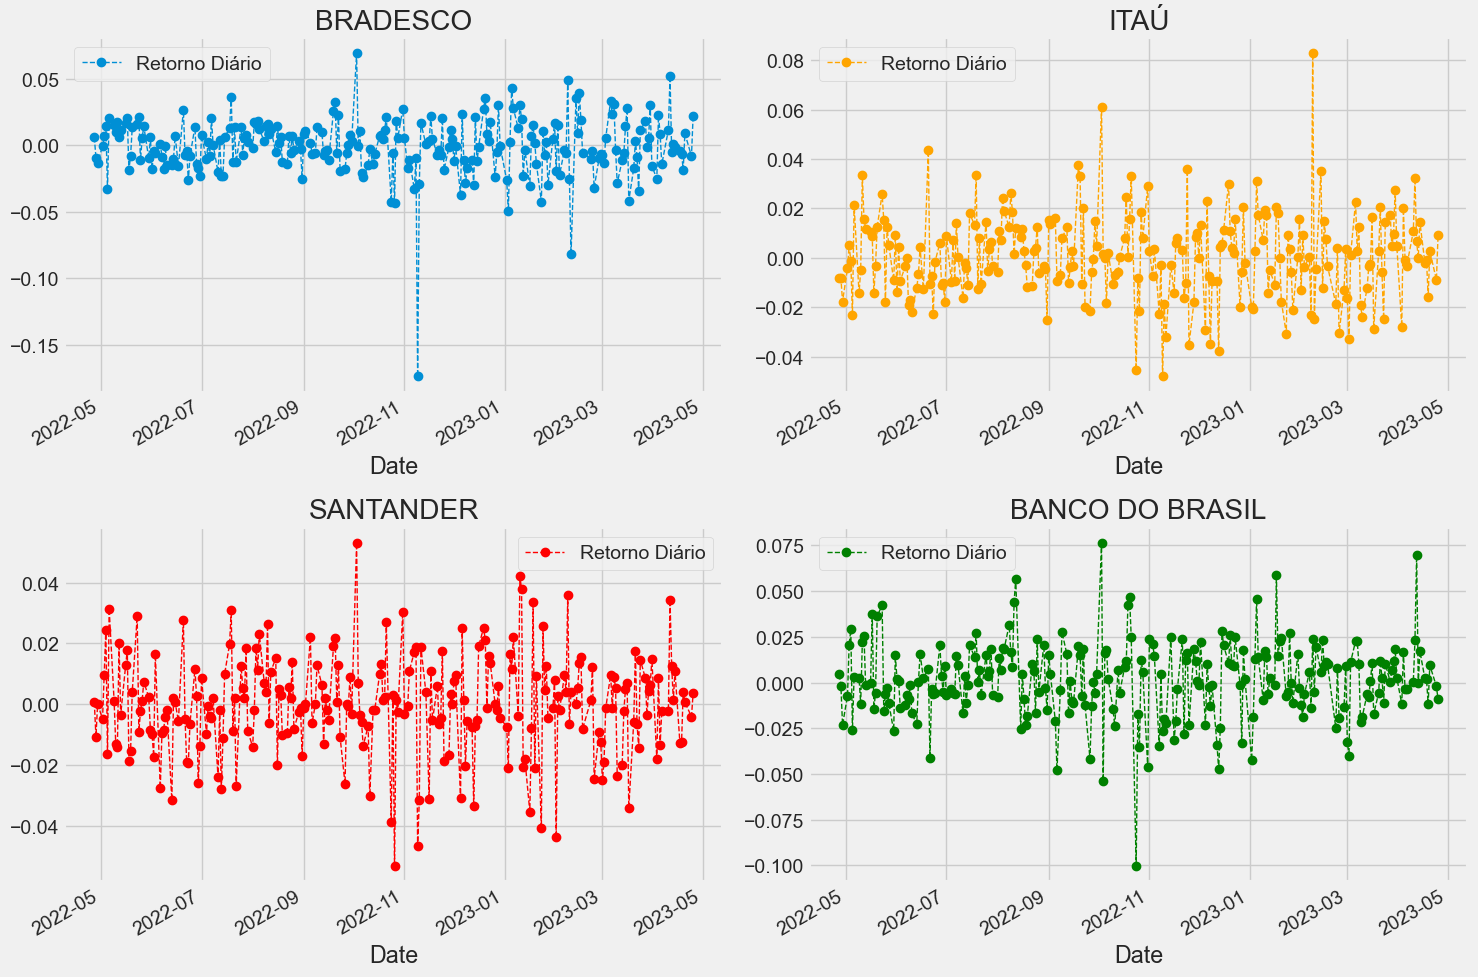

In [15]:
for company in company_list:
    company['Retorno Diário'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBDC4['Retorno Diário'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', linewidth=1)
axes[0,0].set_title('BRADESCO')

ITUB4['Retorno Diário'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', linewidth=1, color='orange')
axes[0,1].set_title('ITAÚ')

SANB4['Retorno Diário'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', linewidth=1, color='red')
axes[1,0].set_title('SANTANDER')

BBAS3['Retorno Diário'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', linewidth=1, color='green')
axes[1,1].set_title('BANCO DO BRASIL')

fig.tight_layout()

Distribuição dos retornos (histograma)

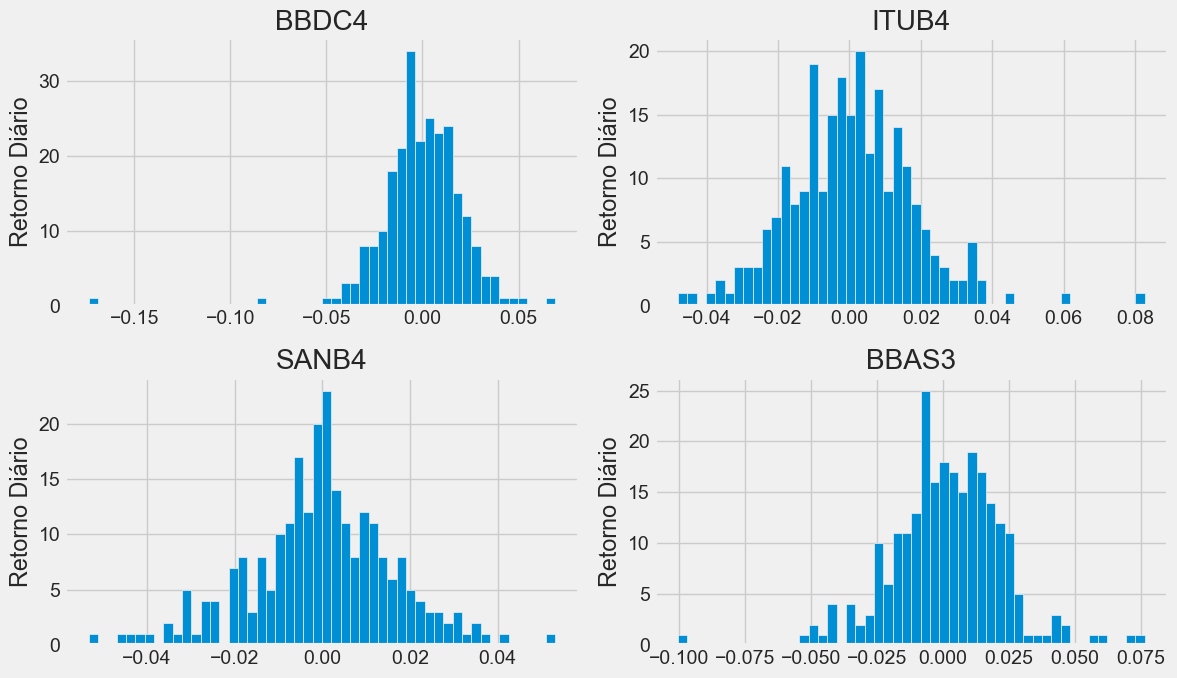

In [16]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Retorno Diário'].hist(bins=50)
    plt.ylabel('Retorno Diário')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. Análise de Correlação

Obtendo apenas o preço de fechamento ajustado

In [17]:
closing_df = yf.download(' '.join(tickers), start, end)['Adj Close']
closing_df.head() 

[*********************100%***********************]  4 of 4 completed


,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA
Date,,,,
2022-04-26,31.711470,17.150251,23.481049,15.824738
2022-04-27,31.851711,17.253454,23.290916,15.834156
2022-04-28,31.795610,17.093960,23.100784,15.664605
2022-04-29,31.057053,16.868795,22.692011,15.664605
2022-05-02,30.832676,16.859411,22.594635,15.589250


Retorno

In [18]:
tickers_rets = closing_df.pct_change()
tickers_rets.head()

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA
Date,,,,
2022-04-26,NaN,NaN,NaN,NaN
2022-04-27,0.004422,0.006018,-0.008097,0.000595
2022-04-28,-0.001761,-0.009244,-0.008163,-0.010708
2022-04-29,-0.023228,-0.013172,-0.017695,0.000000
2022-05-02,-0.007225,-0.000556,-0.004291,-0.004811


Se duas ações estão perfeitamente (e positivamente) uma relação linear entre seus valores de retorno diário deve ocorrer.

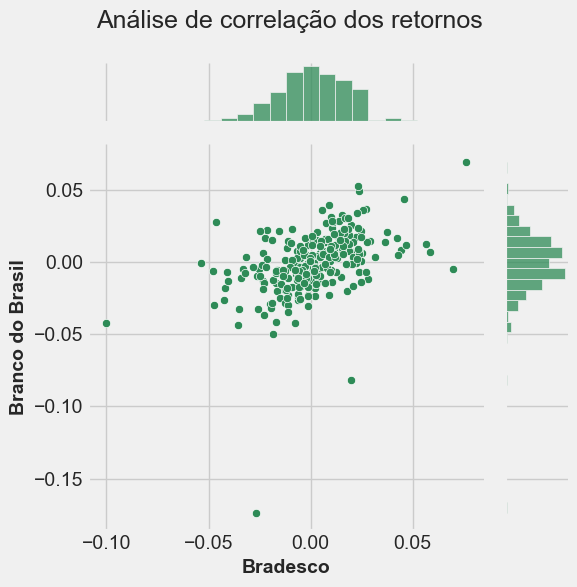

In [19]:
p = sns.jointplot(x='BBAS3.SA', y='BBDC4.SA', data=tickers_rets, kind='scatter', color='seagreen')
p.fig.suptitle("Análise de correlação dos retornos", fontsize=18)
p.ax_joint.set_xlabel('Bradesco', fontweight='bold', fontsize=14)
p.ax_joint.set_ylabel('Branco do Brasil', fontweight='bold', fontsize=14)
p.fig.tight_layout()

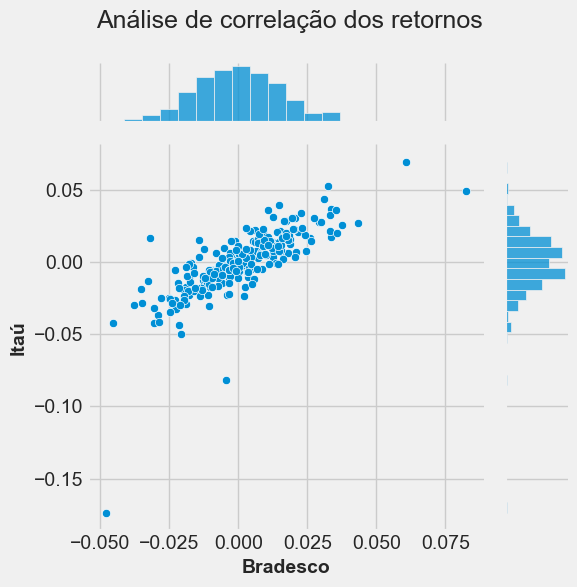

In [20]:
p = sns.jointplot(x='ITUB4.SA', y='BBDC4.SA', data=tickers_rets, kind='scatter')
p.fig.suptitle("Análise de correlação dos retornos", fontsize=18)
p.ax_joint.set_xlabel('Bradesco', fontweight='bold', fontsize=14)
p.ax_joint.set_ylabel('Itaú', fontweight='bold', fontsize=14)
p.fig.tight_layout()

Podemos usar sns.pairplot() para gerar todas as correlações entre as ações

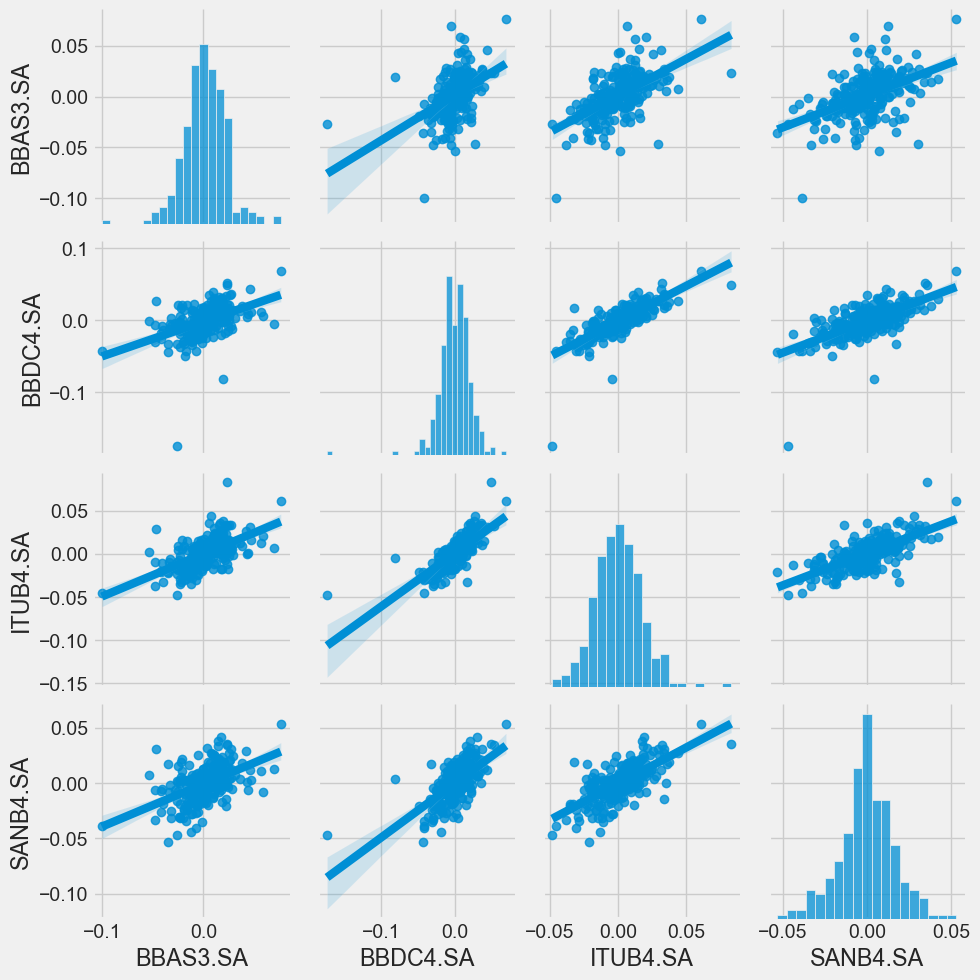

In [21]:
sns.pairplot(tickers_rets, kind='reg')

Podemos usar também o sns.PairGrid() e definir quais gráficos exibir. Neste exemplos usamos um scatter e kde

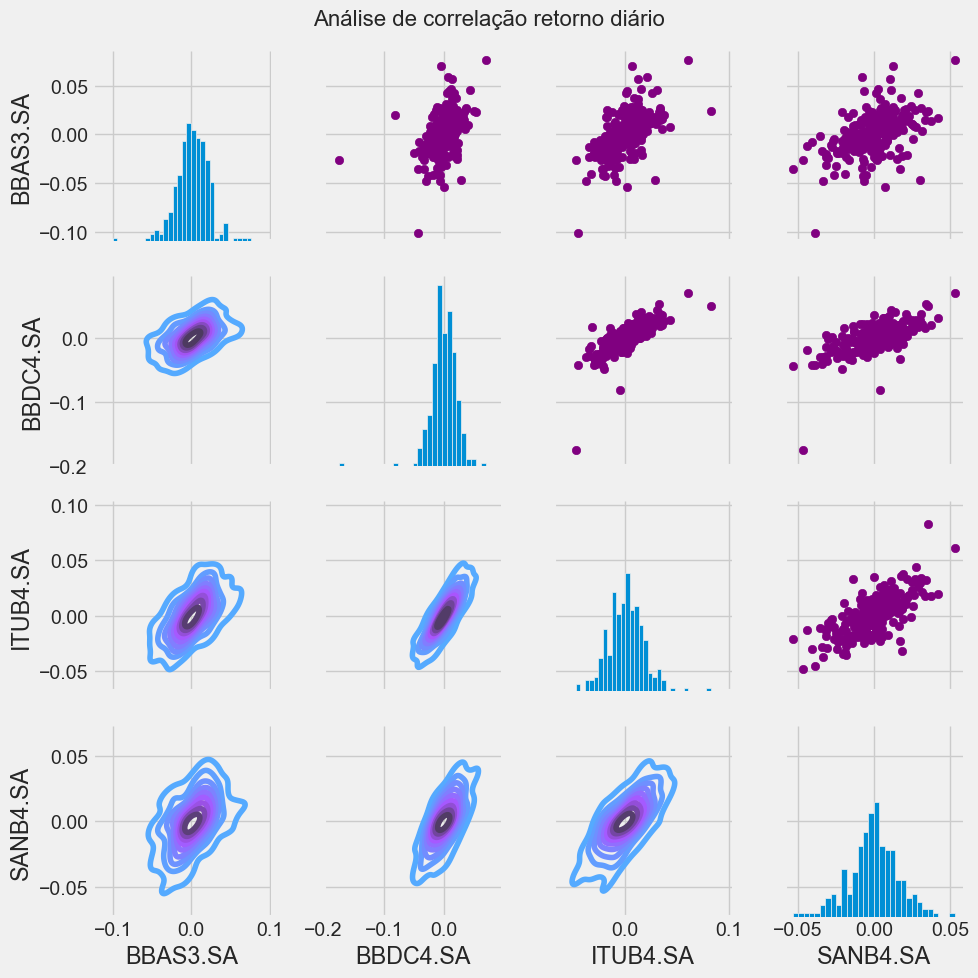

In [22]:
fig = sns.PairGrid(tickers_rets.dropna())
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(plt.hist, bins=30)
fig.fig.suptitle("Análise de correlação retorno diário", fontsize=16)
fig.fig.tight_layout()

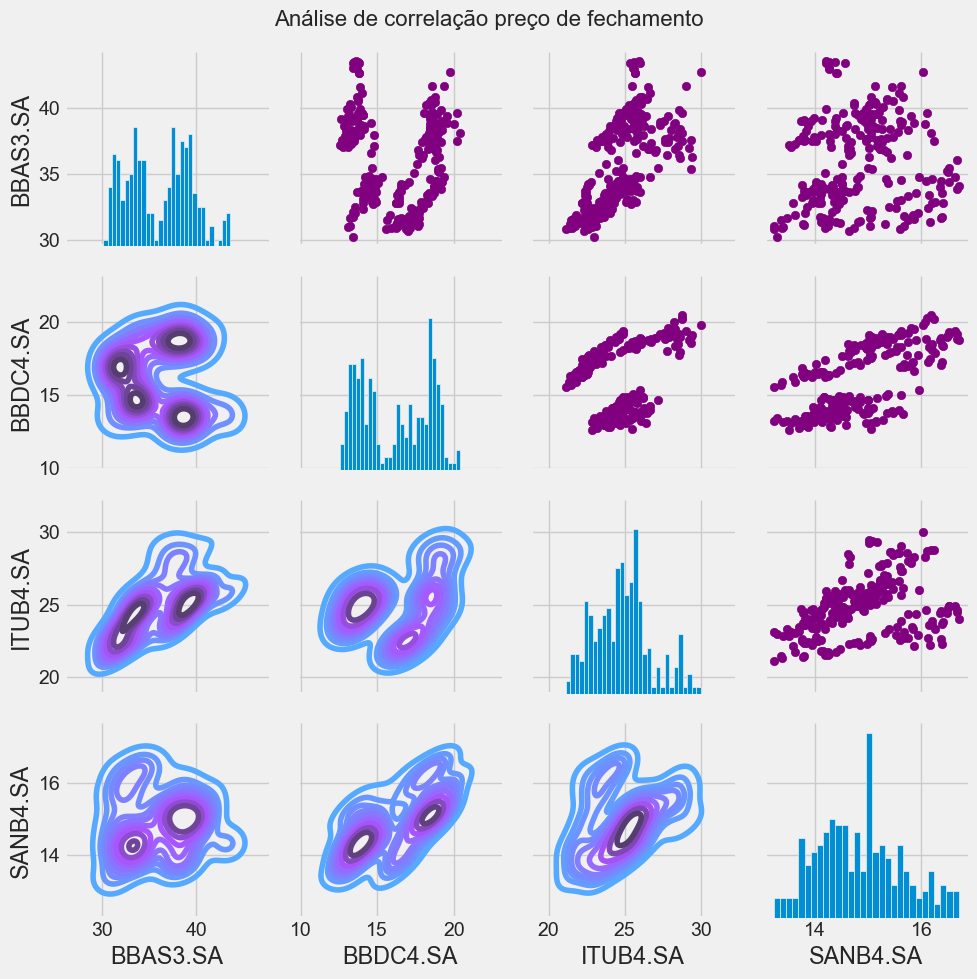

In [23]:
fig = sns.PairGrid(closing_df)
fig.map_upper(plt.scatter,color='purple')
fig.map_lower(sns.kdeplot,cmap='cool_d')
fig.map_diag(plt.hist,bins=30)
fig.fig.suptitle("Análise de correlação preço de fechamento", fontsize=16)
fig.fig.tight_layout()

É possível, também, visualizar o valor da correlação por meio de um heatmap:

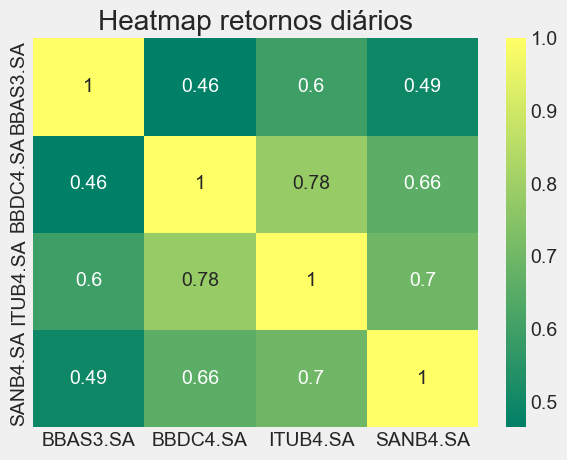

In [24]:
sns.heatmap(tickers_rets.corr(), annot=True, cmap='summer').set_title("Heatmap retornos diários");

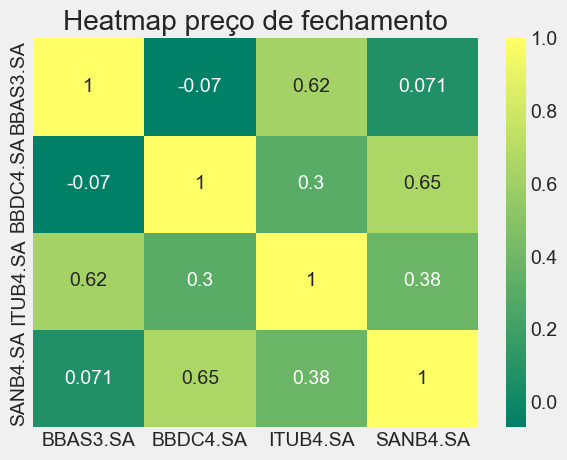

In [25]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer').set_title("Heatmap preço de fechamento");

## 5. Risco de cada ação

Quanto valor colocamos em risco ao investir em uma determinada ação?

Existem muitas maneiras de quantificar o risco, uma das maneiras mais básicas é comparar o retorno esperado com o desvio padrão dos retornos diários.

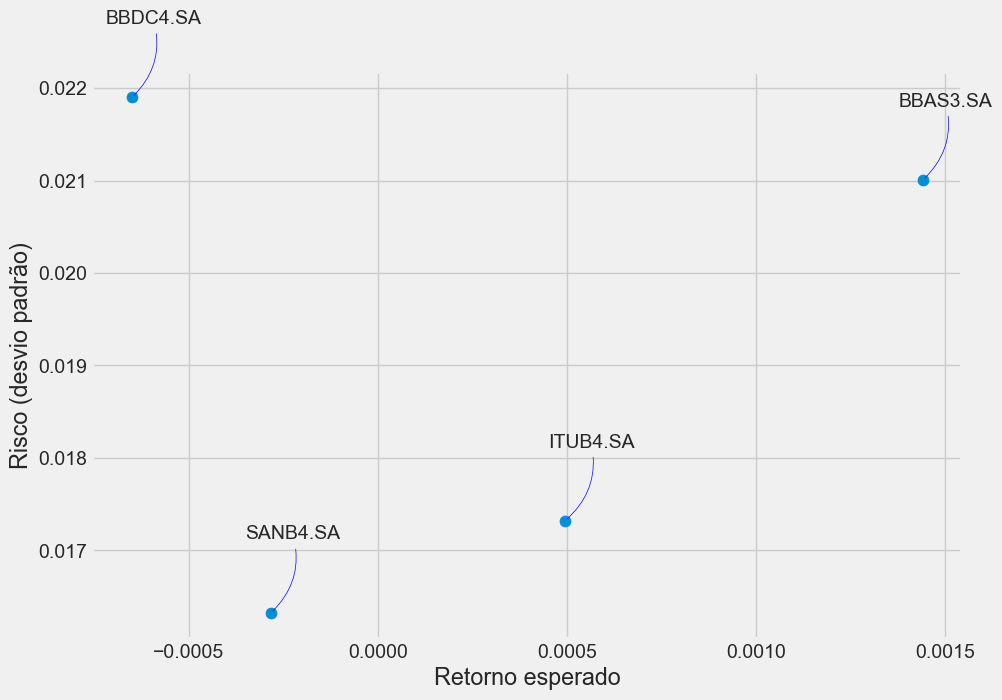

In [26]:
rets = tickers_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Risco (desvio padrão)')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))